In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from google.colab import files

#Load

In [ ]:
files.upload()

In [3]:
df = pd.read_excel('emass.xlsx', parse_dates=['Date'])
len(df)

1258

#Data Understanding

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj', 'Volume'], dtype='object')

membuat data input

In [5]:
df1 = df[['Date', 'Close']]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Close   1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [7]:
df1.head()

,Date,Close
0,2023-11-10,1932.6
1,2023-11-09,1964.2
2,2023-11-08,1951.5
3,2023-11-07,1966.8
4,2023-11-06,1981.6


In [8]:
df1 = df1.sort_values('Date')

In [9]:
df1.head(), df1.tail()

(           Date   Close
 1257 2018-11-12  1201.3
 1256 2018-11-13  1199.2
 1255 2018-11-14  1207.9
 1254 2018-11-15  1212.8
 1253 2018-11-16  1220.8,
         Date   Close
 4 2023-11-06  1981.6
 3 2023-11-07  1966.8
 2 2023-11-08  1951.5
 1 2023-11-09  1964.2
 0 2023-11-10  1932.6)

Text(0.5, 1.0, 'Tren Harga Emas')

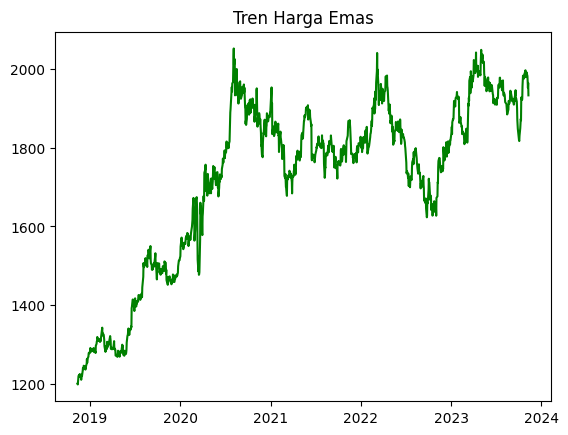

In [10]:
plt.plot(df1['Date'], df1['Close'], 'g')
plt.title('Tren Harga Emas')

#Data Preparation

Membuat Data Fitur

In [11]:
df1 = df1.sort_values('Date')
df1.set_index('Date', inplace=True)

In [12]:
df1 = df1.resample('W').mean().round(1)

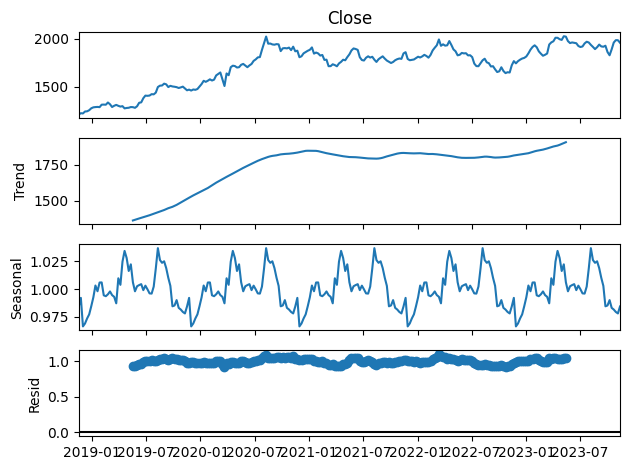

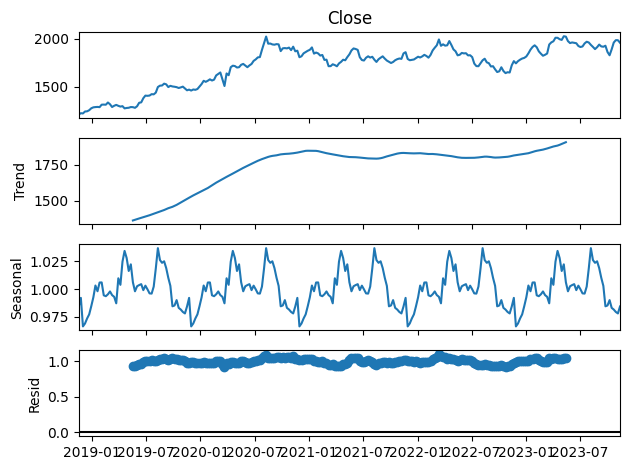

In [13]:
dec = seasonal_decompose(df1['Close'], model='multiplicative')
dec.plot()

split train and test

In [14]:
len(df1), df1.head()

(261,
              Close
 Date              
 2018-11-18  1208.4
 2018-11-25  1222.2
 2018-12-02  1219.4
 2018-12-09  1240.0
 2018-12-16  1241.9)

In [15]:
train = df1.iloc[:-65]
test = df1.iloc[-65:]

In [16]:
len(test), len(train)

(65, 196)

#Modelling

In [32]:
model_sarimax = SARIMAX(df1['Close'],
                        order = (2,1,2),
                        seasonal_order=(1,1,2,4))

step = 4

In [33]:
result = model_sarimax.fit()

predict = result.get_forecast(steps=step)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
x = len(train)

y = len(train) + len(test) + 11

# prediksi 1 tahun

prediction = result.predict(x, y, typ='level').rename('Prediksi')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Prediksi Harga Emas 12 Minggu Kedepan'}, xlabel='Date'>

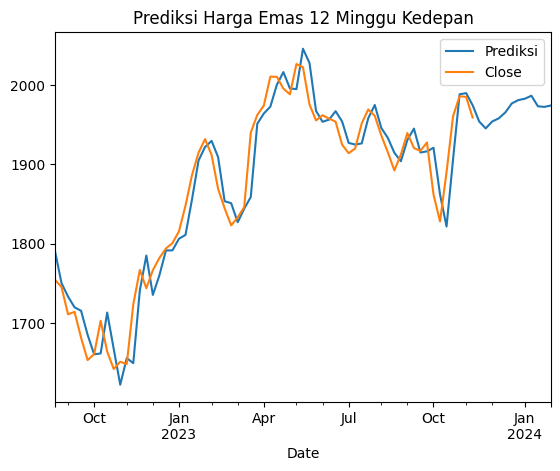

In [35]:
prediction.plot(legend=True, title='Prediksi Harga Emas 12 Minggu Kedepan')
test['Close'].plot(legend=True)